In [16]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=2, noise=10, n_samples=1000)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: x and y must be the same size

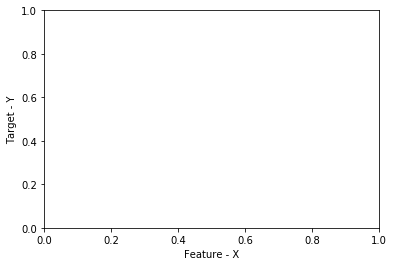

In [19]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=2)

In [16]:
Y.shape

(1000,)

In [1]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [33]:
lr.fit(X[:-5],Y[:-5])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
lr.coef_

array([87.67988726, 65.65095185])

In [26]:
lr.intercept_

-0.3965757598497561

In [35]:
lr.predict(X[-5:])

array([ 24.04634029, -89.6787145 , -17.72120496, -28.40503389,
        49.57480827])

In [27]:
X[:5]

array([[ 0.55385326,  0.19914855],
       [ 0.02960369, -0.43587681],
       [ 0.92296907,  0.0818329 ],
       [ 1.36378636,  0.91960906],
       [-1.01986912, -0.74783077]])

In [36]:
Y[-5:]

array([ 11.82219061, -89.42525167,  -4.95072224, -28.91193084,
        39.78001041])

In [2]:
import pandas as pd

In [3]:
house_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [4]:
house_data.rename(columns={'Living.Room':'Livingroom'}, inplace=True)

In [5]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [6]:
columns = house_data.columns.tolist()

In [7]:
columns.remove('Price')

In [8]:
feature_data = house_data[columns]

In [9]:
target_data = house_data.Price

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
trainX,testX, trainY,testY = train_test_split(feature_data, target_data)

In [12]:
trainX.shape

(483, 6)

In [13]:
testX.shape

(162, 6)

In [14]:
lr = LinearRegression(normalize=True)

In [15]:
lr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
lr.coef_

array([   36.39377254,   785.19438452,   495.56784421,  -999.01827554,
       -5462.07383562,  2983.51532975])

In [17]:
testX[:5]

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom
453,925.080,2,4,2,2,1
237,1757.652,4,16,4,2,2
125,2149.032,5,6,4,2,2
431,3187.968,6,7,3,2,2
639,1889.298,18,21,3,2,2


In [18]:
testY[:5]

453     36000
237     55000
125     80000
431    168000
639     70000
Name: Price, dtype: int64

In [19]:
lr.predict(testX[:5])

array([ 29740.78380331,  68543.9014708 ,  78617.21210898, 118707.79307846,
        87804.57493015])

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
pred = lr.predict(testX)

In [24]:
mean_absolute_error(y_pred=pred, y_true=testY)

17406.10760812217

In [58]:
from sklearn.linear_model import Ridge,Lasso

In [59]:
ridge = Ridge(alpha=1000)
lasso = Lasso(alpha=1000)

In [60]:
ridge.fit(trainX,trainY)
lasso.fit(trainX,trainY)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
pred = ridge.predict(testX)
pred = lasso.predict(testX)

In [62]:
mean_absolute_error(y_pred=pred, y_true=testY)

17303.821844570546

In [63]:
from sklearn.datasets import load_iris

In [64]:
iris = load_iris()

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logreg = LogisticRegression()

In [69]:
logreg.fit(iris.data, iris.target)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
logreg.predict_proba(iris.data[:1])

array([[8.78030305e-01, 1.21958900e-01, 1.07949250e-05]])

In [72]:
iris.target[:1]

array([0])

In [73]:
logreg.score(iris.data, iris.target)

0.96

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pol = PolynomialFeatures(degree=2)

In [76]:
pol.fit_transform([[1,2],[3,4]])

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.]])